In [2]:
import numpy as np
import matplotlib.pyplot as plt

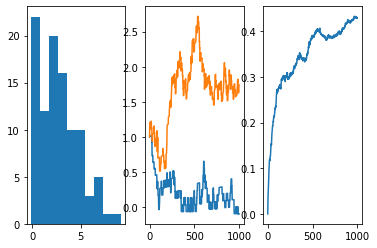

In [30]:
nsteps = 1000
npeople = 100
trades_per_step = 10
wealth = np.ones(shape = (nsteps,npeople))
coin = .1
intrest = 0.001
gini.history = np.zeros(nsteps)
for t in range(1,nsteps):
    wealth[t,:] = wealth[t-1,:]*(1+intrest)
    for i in range(trades_per_step):
        p1 = np.random.randint(low = 0,high = npeople)
        p2 = np.random.randint(low = 0,high = npeople)
        if wealth[t,p1] > 0:
            wealth[t,p1] -= coin
            wealth[t,p2] += coin
    gini.history[t] = gini(wealth[t,:])
            
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[1,:])
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins = 10)
plt.subplot(1,3,2)
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.subplot(1,3,3)
plt.plot(gini.history)


In [4]:
def gini(x):
    y = np.sort(x)
    upper_sum = 0
    n = len(x)
    for i in range(len(y)):
        upper_sum += (i+1)*y[i]
    return 1 - 2/(n-1)*(n - upper_sum/sum(y))
print(gini([1, 1, 1, 1, 1])) #this should be 0
print(gini([1, 0, 0, 0, 0])) #this should be 1
print(gini([1, 0, 1, 0, 0])) #this should be something else

0.0
1.0
0.75


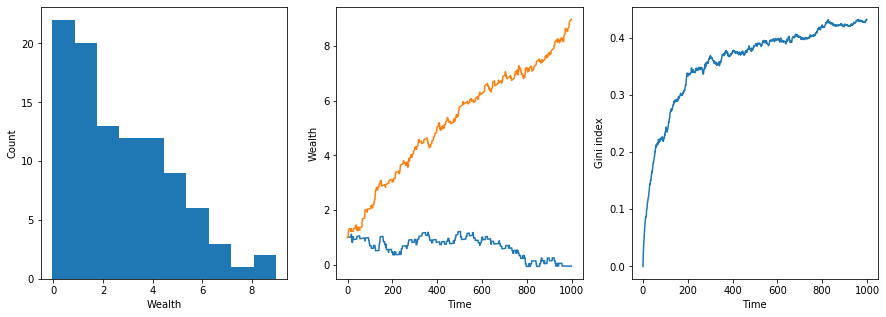

In [9]:
nsteps = 1000
trades_per_step = 10
npeople = 100
coin = 0.1
interest = 0.001

wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)

for t in range(1,nsteps):                             # We now start at t=1, to be able to refer to t-1 (prev step)
    wealth[t,:] = wealth[t-1,:]*(1+interest)          # By default, wealth at t remains the same as it was at t-1
    for i in range(trades_per_step):                  # Let's make more than 2 ppl trade at each time point.
        p1 = np.random.randint(low=0, high=npeople)   # (It doesn't change the end solution, just makes plots prettier.
        p2 = np.random.randint(low=0, high=npeople)   # It's equivalent to only remembering eath Kth step.)
        if wealth[t,p1]>0:
            wealth[t,p1] -= coin        # Still update in place
            wealth[t,p2] += coin
    gini_history[t] = gini(wealth[t,:]) # Calculate gini index for the current distribution of wealth

# Figures
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('Time');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');